In [68]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import loadmat
from skimage.filters import threshold_multiotsu

Data type: float64
Data shape: (2000, 2)


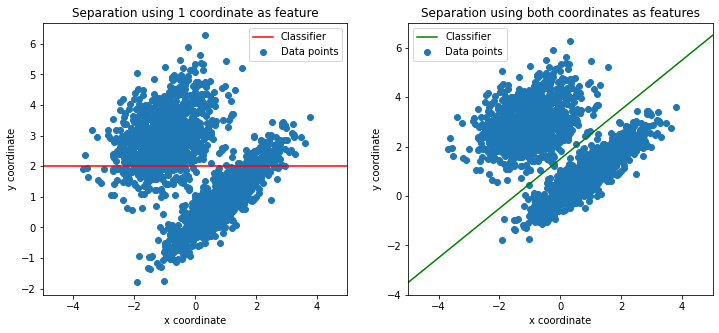

In [80]:
data = loadmat('./data/cdata.mat')
data= np.array(data['cdata'])
print(f'Data type: {data.dtype}')
print(f'Data shape: {data.shape}')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax0.scatter(x=data[:,0], y=data[:,1], label='Data points')
ax0.plot(np.linspace(start=-5, stop=5, num=1000), np.full(shape=(1000), fill_value=2), 'r-', label='Classifier')
ax0.set_xlabel('x coordinate')
ax0.set_ylabel('y coordinate')
ax0.set_xlim([-5,5])
ax0.set_title('Separation using 1 coordinate as feature')
ax0.legend()

ax1.scatter(x=data[:,0], y=data[:,1], label='Data points')
xs = np.linspace(start=-5, stop=5, num=1000)
ax1.plot(xs, xs + 1.5, 'g-', label='Classifier')
ax1.set_xlabel('x coordinate')
ax1.set_ylabel('y coordinate')
ax1.set_xlim([-5,5])
ax1.set_title('Separation using both coordinates as features')
ax1.legend()

HandBW.pnm shape: (243, 303)
HandBW.pnm dtype: uint8
HandBW.pnm max=255 and min=21


Text(0.5, 1.0, 'Classification HandBW.pnm')

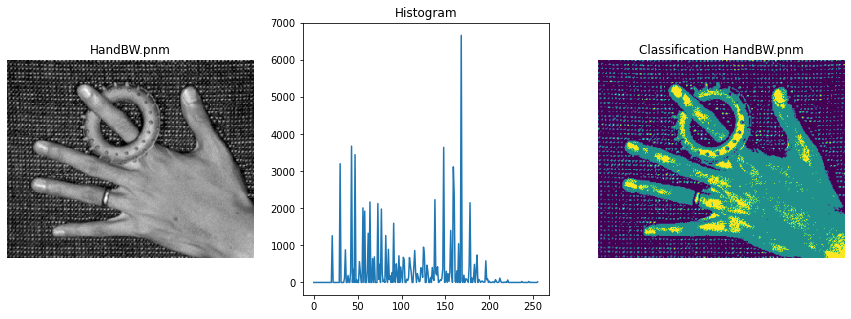

In [81]:
im = cv.imread('./data/handBW.pnm')
im = cv.cvtColor(src=im, code=cv.COLOR_RGB2GRAY)
print(f'HandBW.pnm shape: {im.shape}')
print(f'HandBW.pnm dtype: {im.dtype}')
print(f'HandBW.pnm max={np.max(im)} and min={np.min(im)}')
hist = cv.calcHist(images=[im], channels=[0], mask=None, histSize=[256], ranges=[0,256])
# threshols = threshold_multiotsu(image=im, classes=3, nbins=256)
regions = np.digitize(im, bins=[110, 175])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
ax0.imshow(im, cmap=cm.gray)
ax0.axis('off')
ax0.set_title('HandBW.pnm')

ax1.plot(hist)
ax1.set_title('Histogram')

ax2.imshow(regions)
ax2.axis('off')
ax2.set_title('Classification HandBW.pnm')